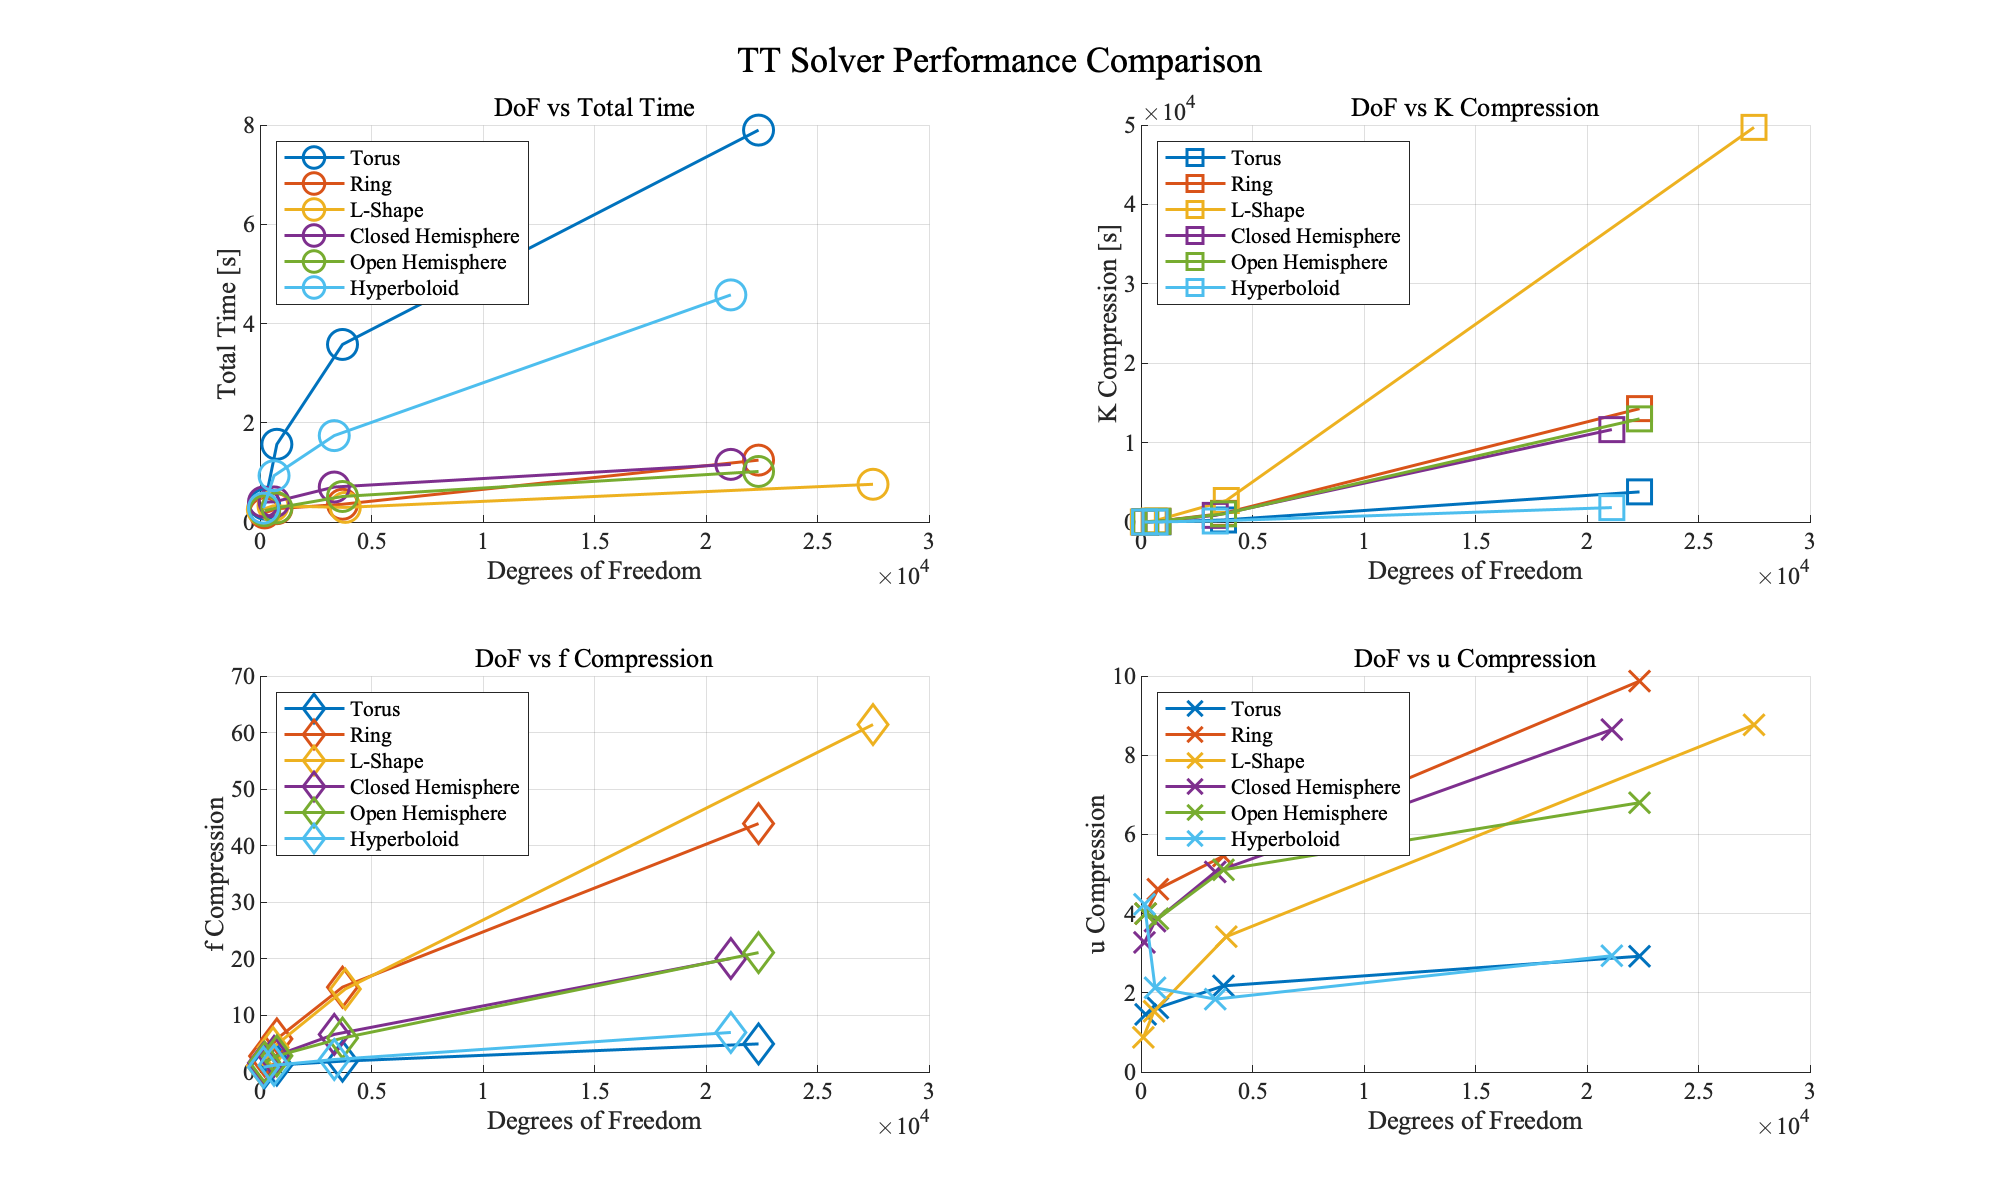

In [1]:
close all; clear; clc;

% Load data
datatt{1} = readmatrix("Torus.csv");
datatt{2} = readmatrix("Ring_high.csv");
datatt{3} = readmatrix("LShape_high.csv");
datatt{4} = readmatrix("Closehemisphere.csv");
datatt{5} = readmatrix("Openhemisphere.csv");
datatt{6} = readmatrix("Hyperboloid.csv");

%% Extract degrees of freedom and relevant quantities

num_cases = numel(datatt);
tt_dof = cell(1, num_cases);
tt_time = cell(1, num_cases);
tt_K_comp = cell(1, num_cases);
tt_f_comp = cell(1, num_cases);
tt_u_comp = cell(1, num_cases);

for i = 1:num_cases
  data = datatt{i};

  tt_dof{i}     = prod(data(:,1:3), 2);
  tt_time{i}    = data(:,4);
  tt_K_comp{i}  = data(:,5);
  tt_f_comp{i}  = data(:,6);
  tt_u_comp{i}  = data(:,7);
end


%% Plotting
%% format figures
set(0,'defaultfigurecolor','w');
set(0,'DefaultAxesTitleFontWeight','normal');
set(0,'DefaultAxesFontSize',20)
set(0,'DefaultAxesFontName','Times New Roman');
set(0,'DefaultLineMarkerSize',15)
% set(0,'DefaultLineMarkerSize',50)
set(0,'defaultLineLineWidth',1.5);
% set(0,'defaultMarkerSize',5);
set(0,'defaultTextFontName', 'Times New Roman')
set(0, 'DefaultFigureRenderer', 'painters');
set(0,'defaultAxesXGrid','on')
set(0,'defaultAxesYGrid','on')

%%
% Assumes the following cell arrays are already filled from Option 2:
% tt_dof, tt_time, tt_K_comp, tt_f_comp, tt_u_comp

names = {'Torus', 'Ring', 'L-Shape', 'Closed Hemisphere', 'Open Hemisphere', 'Hyperboloid'};
colors = lines(6);  % For distinct plot colors

figure('Name', 'TT Performance Metrics vs DoF', 'Color', 'w');
sgtitle('TT Solver Performance Comparison', 'FontSize', 18);

% 1. DoF vs Total Time
subplot(2,2,1)
hold on;
for i = 1:6
  loglog(tt_dof{i}, tt_time{i}, 'o-', 'LineWidth', 1.5, 'Color', colors(i,:), 'DisplayName', names{i});
end
xlabel('Degrees of Freedom');
ylabel('Total Time [s]');
title('DoF vs Total Time');
grid on; legend('Location','northwest'); set(gca, 'FontSize', 12);

% 2. DoF vs K Assembly Time
subplot(2,2,2)
hold on;
for i = 1:6
  loglog(tt_dof{i}, tt_K_comp{i}, 's-', 'LineWidth', 1.5, 'Color', colors(i,:), 'DisplayName', names{i});
end
xlabel('Degrees of Freedom');
ylabel('K Compression [s]');
title('DoF vs K Compression');
grid on; legend('Location','northwest'); set(gca, 'FontSize', 12);

% 3. DoF vs f Assembly Time
subplot(2,2,3)
hold on;
for i = 1:6
  loglog(tt_dof{i}, tt_f_comp{i}, 'd-', 'LineWidth', 1.5, 'Color', colors(i,:), 'DisplayName', names{i});
end
xlabel('Degrees of Freedom');
ylabel('f Compression');
title('DoF vs f Compression');
grid on; legend('Location','northwest'); set(gca, 'FontSize', 12);

% 4. DoF vs u Solve Time
subplot(2,2,4)
hold on;
for i = 1:6
  loglog(tt_dof{i}, tt_u_comp{i}, 'x-', 'LineWidth', 1.5, 'Color', colors(i,:), 'DisplayName', names{i});
end
xlabel('Degrees of Freedom');
ylabel('u Compression');
title('DoF vs u Compression');
grid on; legend('Location','northwest'); set(gca, 'FontSize', 12);

set(gcf, 'Position', [0, 0, 1000, 600]);